2d plot of dq vs dR

In [1]:
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.9
scipy: 1.3.0
numpy: 1.16.4


In [2]:
figI = 0
# simple structure
thicks_true = [10,120,100,130,10]
bs_true = [0,5,4.5,5,10]
roughs_true = [0,0,0,0,0]
# bs = [5,4.5,5]
# thicks = [120,100,130]
# roughs = [0,0,0]
bs = bs_true
thicks = thicks_true
roughs = roughs_true
loss = 1.
no_layers = len(bs)
no_layers = len(bs_true)
# no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


<IPython.core.display.Javascript object>


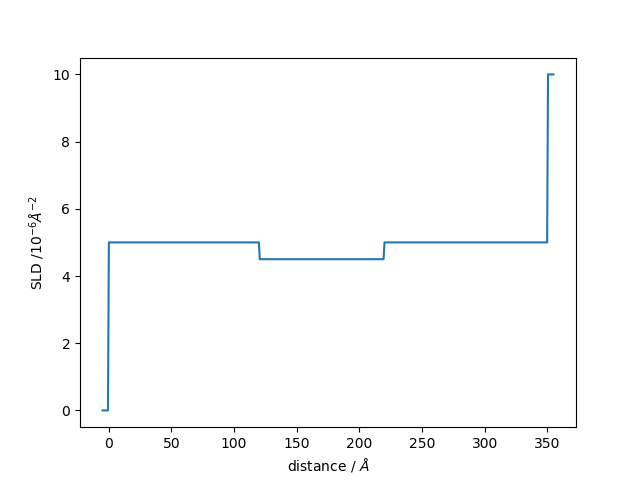

done


In [20]:
%matplotlib notebook
plt.figure(figI)
figI+=1
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

In [4]:
maxLength = 350
def logp_extra(model, data=None):
    returns = 0
    if sum(model.structure.slabs()[1:-1,0])>maxLength:
        returns = -np.inf
    return returns

In [21]:
# from seperat import seperateNLayer as snl
from sepObjective import getObjective as gO
import make_sim_data as msd
doMCMC=False
q = np.linspace(0.005, 0.3, 70)
resolutions = [1.,3.,7.,9.]
dRScaleBys = [5,10,15,20]
objective1=[]
objective2=[]
lnPosts1 = []
lnPosts2 = []
lnPostss = []
figI=1
# resolution = 5.
for dRScaleBy in dRScaleBys:
#     datas=[]
    for resolution in resolutions:
        model = ReflectModel(structure, bkg=3e-6, dq=resolution)
        R = model(q, x_err=resolution)
        sim_dR = msd.main(sim_q=q,sim_R=R)*dRScaleBy;
        data = Data1D(data= (q,R,sim_dR))
#         lnPost = snl(data,3)

        print("dRScaleBy:",dRScaleBy,"resolution:",resolution)
        try:
            objective = gO(data,3, fitDq=True,logpExtra=logp_extra,)
            objective1.append(objective)
            fitter = CurveFitter(objective)
            if not doMCMC:
                fitter.fit("differential_evolution", "nlpost")
            else:
                fitter.sample(500)
                fitter.sampler.reset()
                fitter.sample(40, nthin=50)
        except:
            print("fitDq can not be used")
        else:
            print("fitDq can not be used")
            objective = gO(data,3,logpExtra=logp_extra,)
            objective1.append(objective)
            fitter = CurveFitter(objective)
            if not doMCMC:
                fitter.fit("differential_evolution", "nlpost")
            else:
                fitter.sample(500)
                fitter.sampler.reset()
                fitter.sample(40, nthin=50)
        lnPost = objective.logpost()
        print(lnPost)
        lnPosts1.append(lnPost)

        try:
            objective = gO(data,3, fitDq=True)
            objective2.append(objective)
            fitter = CurveFitter(objective)
            if not doMCMC:
                fitter.fit("differential_evolution", "nlpost")
            else:
                fitter.sample(500)
                fitter.sampler.reset()
                fitter.sample(40, nthin=50)
        except:
            print("fitDq can not be used")
        else:
            print("fitDq can not be used")
            objective = gO(data,3)
            objective2.append(objective)
            fitter = CurveFitter(objective)
            if not doMCMC:
                fitter.fit("differential_evolution", "nlpost")
            else:
                fitter.sample(500)
                fitter.sampler.reset()
                fitter.sample(40, nthin=50)
        lnPost = objective.logpost()
        print(lnPost)
        lnPosts2.append(lnPost)

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]
dRScaleBy: 5 resolution: 1.0
fitDq can not be used
-879.3573474250287
fitDq can not be used
-883.3533799144417
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+0

var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]
dRScaleBy: 20 resolution: 3.0
fitDq can not be used
14.499364246967982
fitDq can not be used
14.508225493359497
csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.483

In [16]:
f=open("dDqDR2FittedDq.txt","w+")
f.write("limited max thickness ln(Posts):\n")
for lnEvidence in lnPosts1:
    f.write(str(lnEvidence)+"\n")
f.write("\nnot limited max thickness ln(Posts):\n")
for lnEvidence in lnPosts2:
    f.write(str(lnEvidence)+"\n")
f.close()

thickness limited ln(post): [-879.3573474250287, -252.76380603003236, -80.74432878750103, -689.8820378656525, -170.55640665778185, -9.741126775361822, 31.860755432700383, -113.50923826462525, -58.60579397673291, 15.77980029544607, 33.05203426280714, -39.38634213864076, 31.129776121946293, 14.499364246967982, 29.613158694582605, -13.2060322281132]
not thickness limited ln(post): [-883.3533799144417, -252.7393342170191, -103.75536678213756, -871.905709128692, -170.4608214512104, -9.757677926337347, 21.353230197988378, -108.64673057925287, -58.49800199506389, 15.779800283357975, 33.00252965263026, -23.931786661450786, 31.104003626348216, 14.508225493359497, 31.114855713397123, -5.661971761280601]


<IPython.core.display.Javascript object>


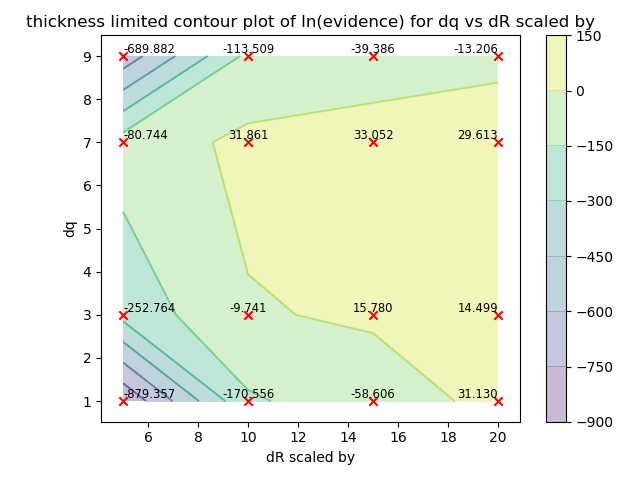

<IPython.core.display.Javascript object>


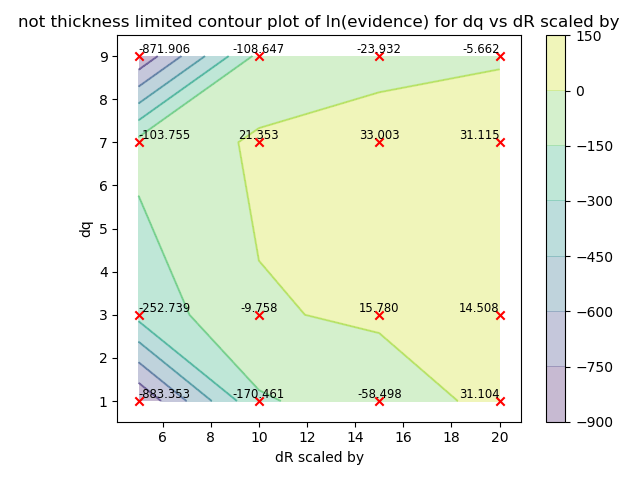

In [22]:
ha_s = ["left", "center", "center", "right"]

print("thickness limited ln(post):",lnPosts1)
print("not thickness limited ln(post):",lnPosts2)

zs= np.array(lnPosts1).reshape(len(resolutions), len(dRScaleBys)).transpose()
plt.figure(figI)
figI+=1
plt.contour(dRScaleBys,resolutions,zs,alpha=0.5);
plt.contourf(dRScaleBys,resolutions,zs,alpha=0.3);
plt.colorbar();
for i in range(len(dRScaleBys)):
    for j in range(len(resolutions)):
        plt.scatter(dRScaleBys[i],resolutions[j],c="red",marker="x");
        ha = ha_s[i]
        plt.annotate("%.3f"%zs[j][i],(dRScaleBys[i],resolutions[j]),
                    horizontalalignment=ha, fontsize="small", verticalalignment='bottom')
# for x in dRScaleBys:
#     for y in resolutions:
#         plt.scatter(x,y,c="red",marker="x");
plt.ylabel("dq");
plt.xlabel("dR scaled by");
plt.title("thickness limited contour plot of ln(evidence) for dq vs dR scaled by");
plt.tight_layout();
plt.show();
#--------

zs= np.array(lnPosts2).reshape(len(resolutions), len(dRScaleBys)).transpose()
plt.figure(figI)
figI+=1
plt.contour(dRScaleBys,resolutions,zs,alpha=0.5);
plt.contourf(dRScaleBys,resolutions,zs,alpha=0.3);
plt.colorbar();
for i in range(len(dRScaleBys)):
    for j in range(len(resolutions)):
        plt.scatter(dRScaleBys[i],resolutions[j],c="red",marker="x");
        ha = ha_s[i]
        plt.annotate("%.3f"%zs[j][i],(dRScaleBys[i],resolutions[j]),
                    horizontalalignment=ha, fontsize="small", verticalalignment='bottom')
# for x in dRScaleBys:
#     for y in resolutions:
#         plt.scatter(x,y,c="red",marker="x");
plt.ylabel("dq");
plt.xlabel("dR scaled by");
plt.title("not thickness limited contour plot of ln(evidence) for dq vs dR scaled by");
plt.tight_layout();
plt.show();

thickness limited ln(post): [-879.9685241013501, -252.49701291232014, -141.49883716530408, -871.5497259719879, -170.3669050233451, -9.752257615344899, 28.265240595092894, -158.4047459586607, -58.529699289883965, 15.754859736646292, 33.03692774564206, -45.996990865469435, -29.61542052827501, 14.49085419914303, 26.89107650057628, -16.904694569330054]
not thickness limited ln(post): [-880.1756410883636, -253.0329830737746, -103.74812011580569, -810.3727901682903, -170.51127512892737, -9.740985797061304, 37.8513033107907, -158.2716944048955, -58.75560314167923, 15.779741768214162, 33.664666591054356, -49.06949553009686, -29.668397415092695, 14.50822550596736, 32.93454813135884, -16.952999486382453]


<IPython.core.display.Javascript object>


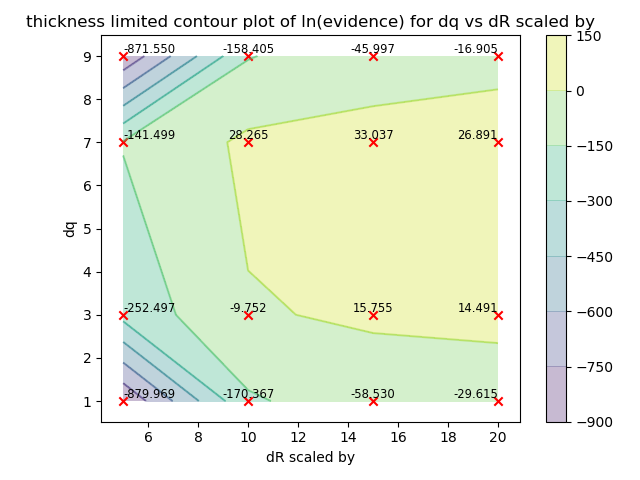

<IPython.core.display.Javascript object>


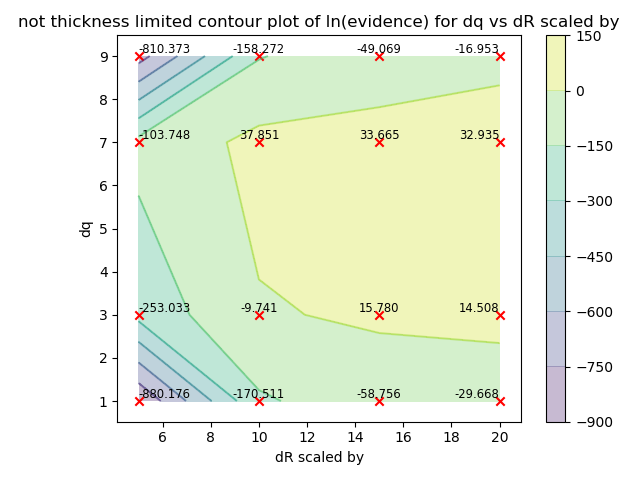

In [18]:
# %%time
# print(lnPosts1,len(dRScaleBys),len(resolutions))
# zs=[] #lnpost
# zss=[]
# xs=[] #dR scale
# ys=[] #dq
# lendR=len(dRScaleBys)
# lenReso=len(resolutions)
# for i in range(lendR):
#     zs=[]
#     for j in range(lenReso):
#         z = lnPosts1[lendR*i+j]
# #         print(i,j,z,lendR*i+j)
#         zs.append(z)
# #         xs.append(i)
# #         ys.append(j)
#     zss.append(zs)
# # print(zss,"\n",zss[0],"\n",zss[0][0])
# # print(len(zss),len(xs),len(ys))

# zs= np.array(lnPosts1).reshape(len(resolutions), len(dRScaleBys))
# print(zs)
# plt.figure(figI)
# figI+=1
# plt.contour(dRScaleBys,resolutions,zs,alpha=0.5)
# plt.contourf(dRScaleBys,resolutions,zs,alpha=0.3)
# plt.colorbar()
# for x in dRScaleBys:
#     for y in resolutions:
#         plt.scatter(x,y,c="red",marker="x")
# plt.ylabel("dq")
# plt.xlabel("dR scaled by")
# plt.show()

ha_s = ["left", "center", "center", "right"]

print("thickness limited ln(post):",lnPosts1)
print("not thickness limited ln(post):",lnPosts2)

zs= np.array(lnPosts1).reshape(len(resolutions), len(dRScaleBys)).transpose()
plt.figure(figI)
figI+=1
plt.contour(dRScaleBys,resolutions,zs,alpha=0.5);
plt.contourf(dRScaleBys,resolutions,zs,alpha=0.3);
plt.colorbar();
for i in range(len(dRScaleBys)):
    for j in range(len(resolutions)):
        plt.scatter(dRScaleBys[i],resolutions[j],c="red",marker="x");
        ha = ha_s[i]
        plt.annotate("%.3f"%zs[j][i],(dRScaleBys[i],resolutions[j]),
                    horizontalalignment=ha, fontsize="small", verticalalignment='bottom')
# for x in dRScaleBys:
#     for y in resolutions:
#         plt.scatter(x,y,c="red",marker="x");
plt.ylabel("dq");
plt.xlabel("dR scaled by");
plt.title("thickness limited contour plot of ln(evidence) for dq vs dR scaled by");
plt.tight_layout();
plt.show();
#--------

zs= np.array(lnPosts2).reshape(len(resolutions), len(dRScaleBys)).transpose()
plt.figure(figI)
figI+=1
plt.contour(dRScaleBys,resolutions,zs,alpha=0.5);
plt.contourf(dRScaleBys,resolutions,zs,alpha=0.3);
plt.colorbar();
for i in range(len(dRScaleBys)):
    for j in range(len(resolutions)):
        plt.scatter(dRScaleBys[i],resolutions[j],c="red",marker="x");
        ha = ha_s[i]
        plt.annotate("%.3f"%zs[j][i],(dRScaleBys[i],resolutions[j]),
                    horizontalalignment=ha, fontsize="small", verticalalignment='bottom')
# for x in dRScaleBys:
#     for y in resolutions:
#         plt.scatter(x,y,c="red",marker="x");
plt.ylabel("dq");
plt.xlabel("dR scaled by");
plt.title("not thickness limited contour plot of ln(evidence) for dq vs dR scaled by");
plt.tight_layout();
plt.show();

thickness limited ln(post): [-879.9685241013501, -252.49701291232014, \-141.49883716530408, -871.5497259719879, -170.3669050233451, \-9.752257615344899, 28.265240595092894, -158.4047459586607, \-58.529699289883965, 15.754859736646292, 33.03692774564206, \-45.996990865469435, -29.61542052827501, 14.49085419914303, 26.89107650057628, \-16.904694569330054]\
not thickness limited ln(post): [-880.1756410883636, -253.0329830737746, \-103.74812011580569, -810.3727901682903, -170.51127512892737, \-9.740985797061304, 37.8513033107907, -158.2716944048955, -58.75560314167923, \15.779741768214162, 33.664666591054356, -49.06949553009686, \-29.668397415092695, 14.50822550596736, 32.93454813135884, -16.952999486382453]

-224.8269656444011, 933.353760130785, 1027.4314984717366, -346.83627507767676, -212.05837655341045, 933.4030410628999, 1027.431498820902, -346.8362749594579, -224.82696511477994, 991.2533100677164, 1027.431498788609, -359.04899429618604, -266.0615509177185, 991.2533104397437, 1027.43149881008, -359.0489961585083